In [430]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
from scipy.stats import ks_2samp, randint
%matplotlib inline

In [431]:
# load data
train_data = pd.read_csv('train.csv')
#test_data has perished vs survived data included
test_data = pd.read_csv('test.csv')
gender_data = pd.read_csv('gender_submission.csv')



trd = pd.read_csv('train.csv')
tsd = pd.read_csv('test.csv')
titanic_data = pd.concat([train_data, test_data], ignore_index=True, sort  = False)

In [432]:
# display graphs correctly
%matplotlib inline
#plt.rcParams['figure.figsize'] = (5, 3)
#plt.rcParams['figure.dpi'] = 75

In [433]:
#inspect data. 
titanic_data.head(200)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
196,197,0.0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
197,198,0.0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
198,199,1.0,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


In [434]:
#inspect each column further
print(titanic_data.describe())

       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


Text(0.5, 1.0, 'Missing values heatmap')

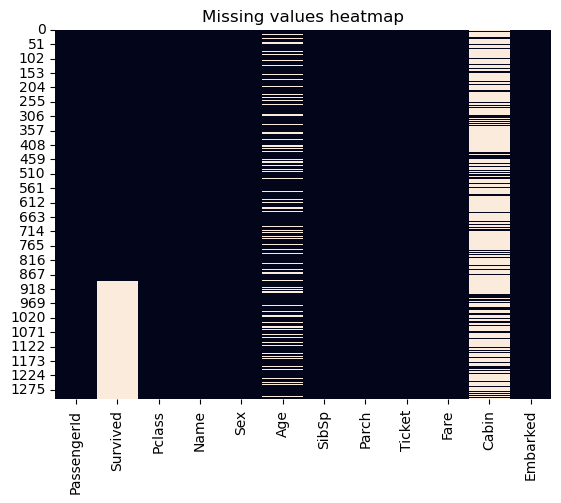

In [435]:
titanic_data.isnull().sum()
sns.heatmap(titanic_data.isnull(), cbar = False).set_title("Missing values heatmap")

In [436]:
# identify datatypes of the 11 columns, add the stats to the datadict
datadict = pd.DataFrame(titanic_data.dtypes)
datadict

,0
PassengerId,int64
Survived,float64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [437]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = titanic_data.isnull().sum()
datadict

,0,MissingVal
PassengerId,int64,0
Survived,float64,418
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,263
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,1


In [438]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique']=titanic_data.nunique()
datadict

,0,MissingVal,NUnique
PassengerId,int64,0,1309
Survived,float64,418,2
Pclass,int64,0,3
Name,object,0,1307
Sex,object,0,2
Age,float64,263,98
SibSp,int64,0,7
Parch,int64,0,8
Ticket,object,0,929
Fare,float64,1,281


In [439]:
titanic_data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [440]:
# get discriptive statistcs on "number" datatypes
titanic_data.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Axes: >

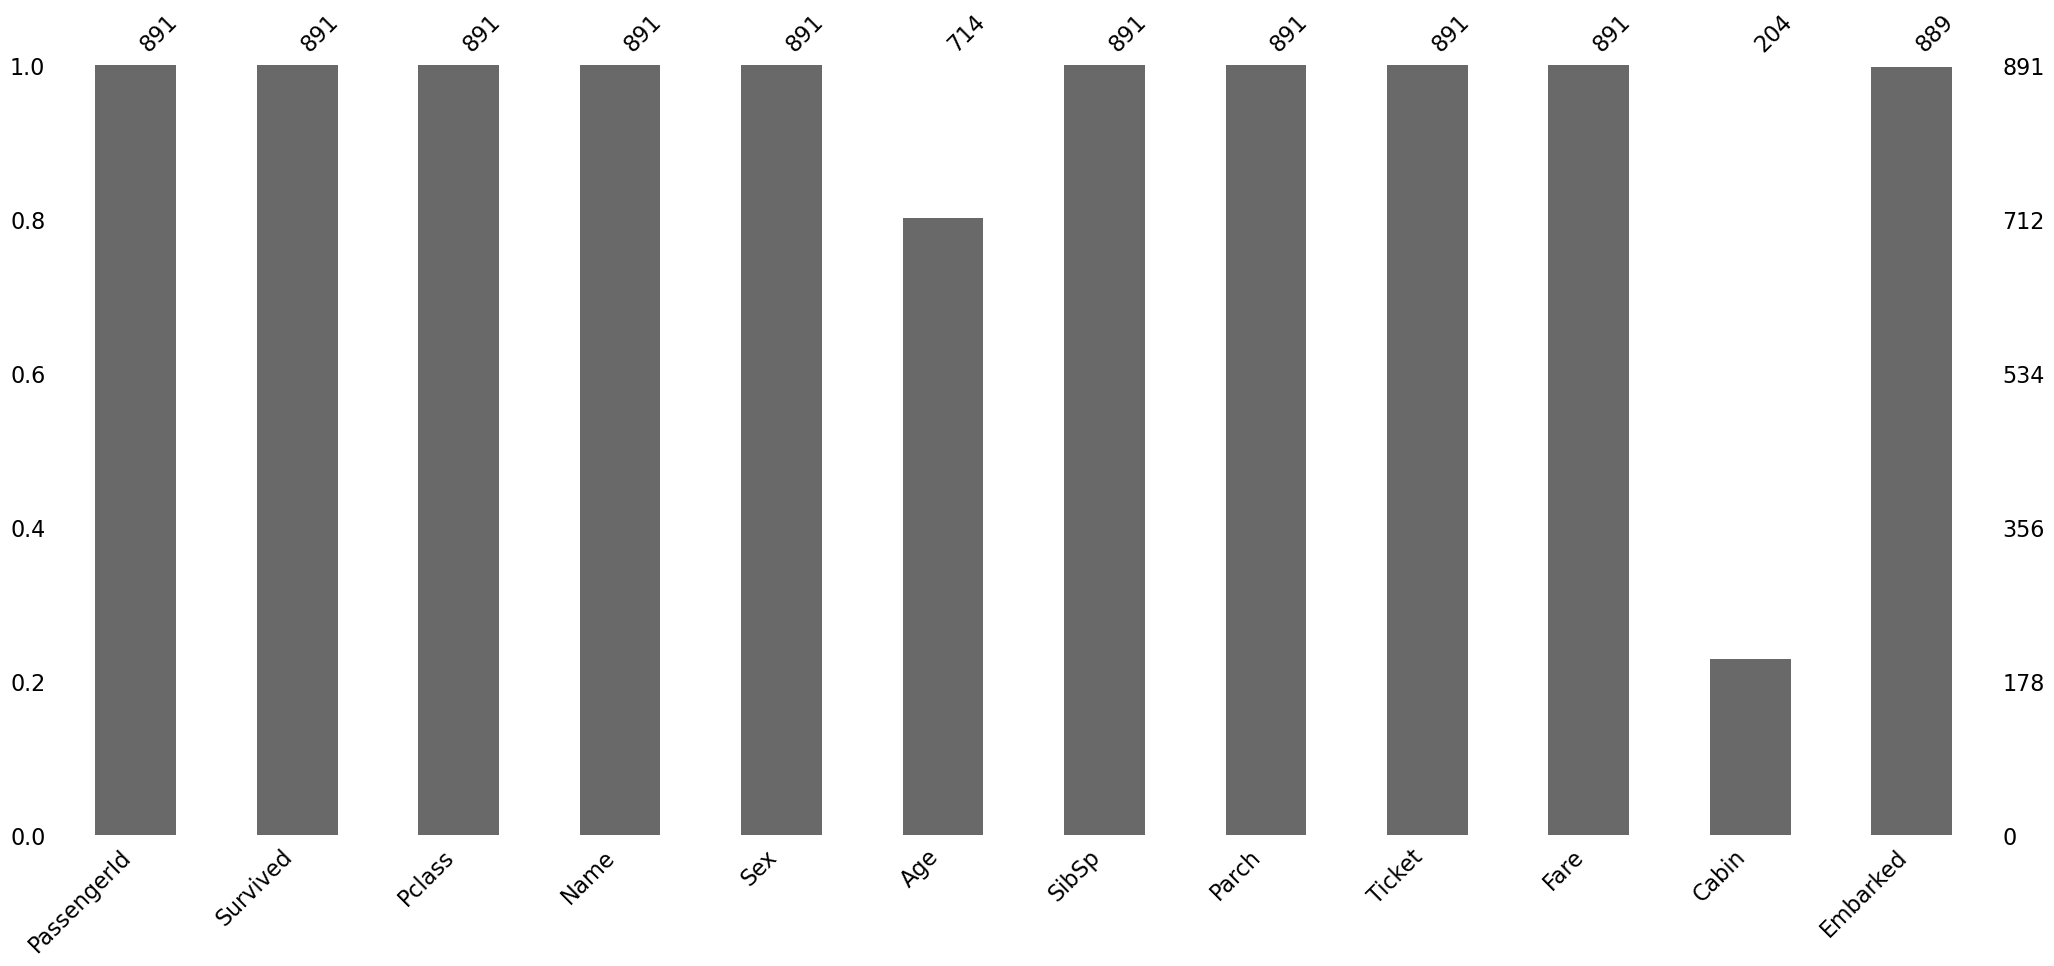

In [441]:
import missingno as msno
display(msno.bar(trd))

<Axes: >

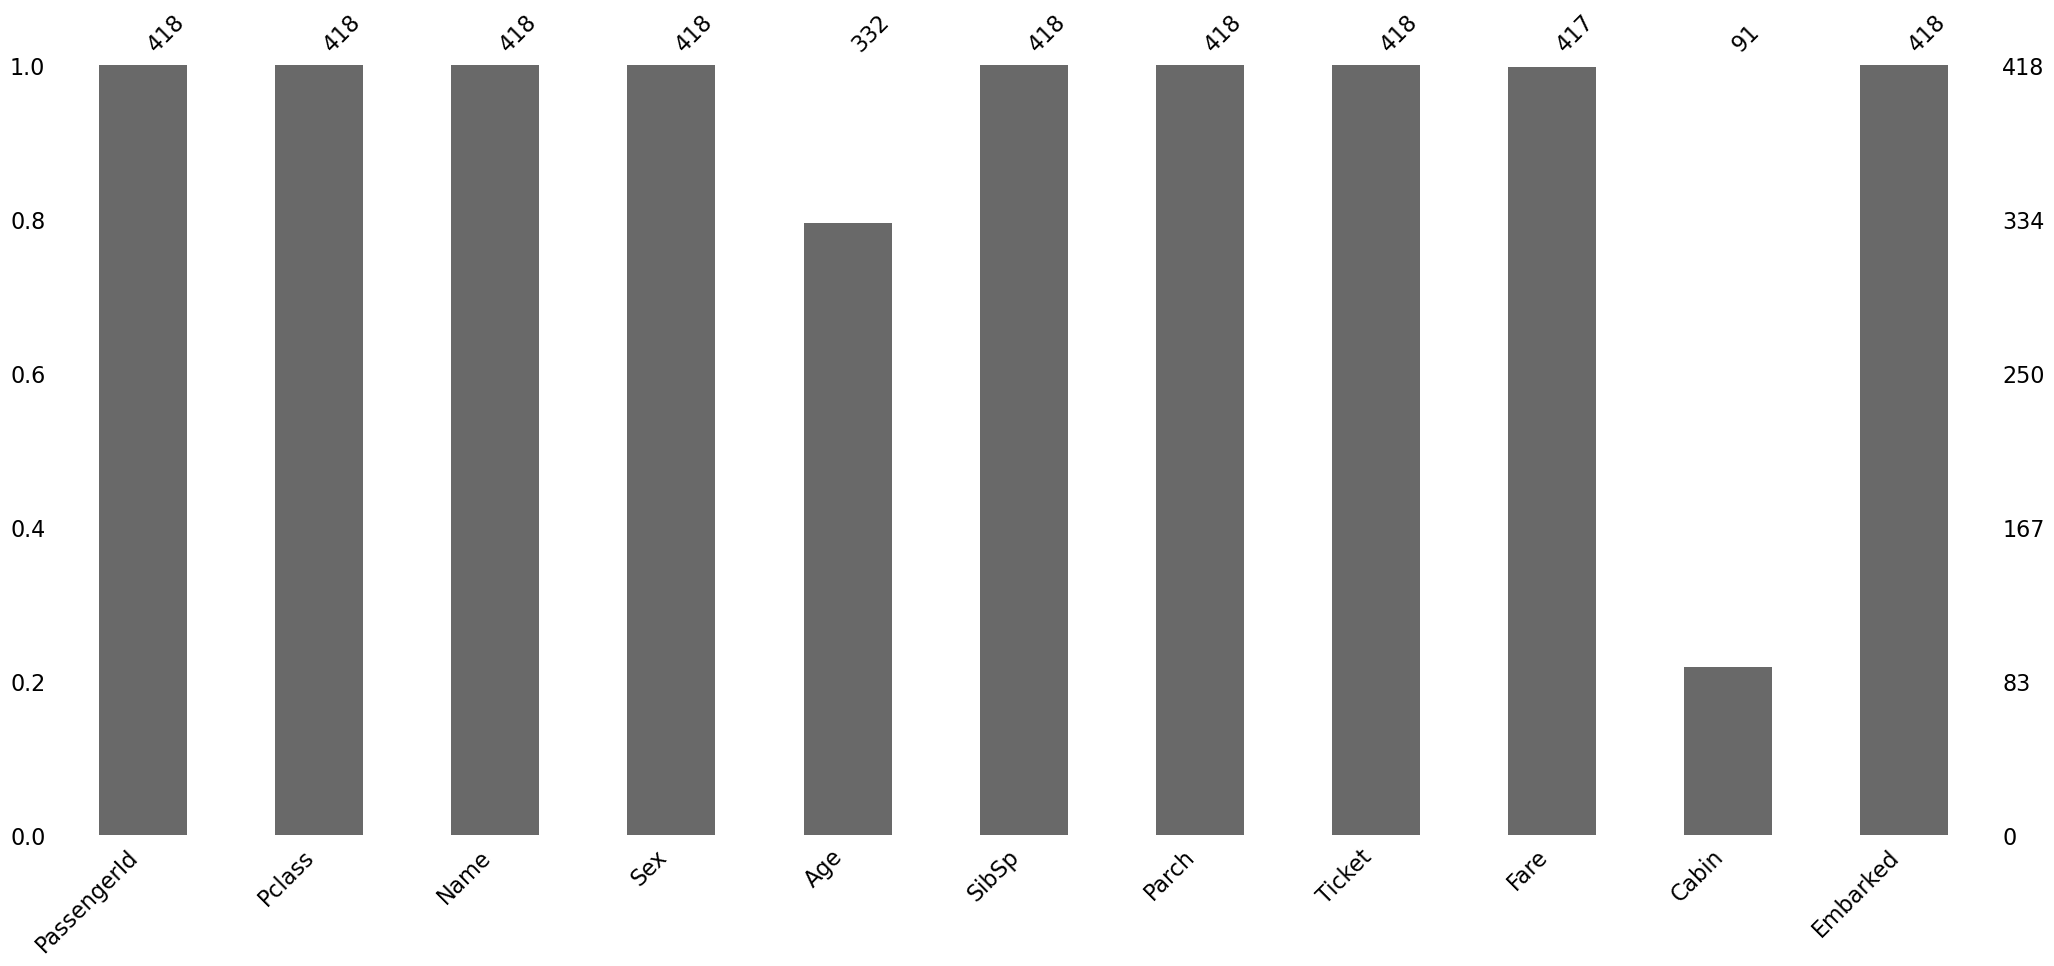

In [442]:
display(msno.bar(tsd))


In [443]:
#Remove the column Cabin
trd.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
tsd.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [444]:
names_sorted = np.sort(titanic_data.Name)

In [445]:
print(names_sorted)

['Abbing, Mr. Anthony' 'Abbott, Master. Eugene Joseph'
 'Abbott, Mr. Rossmore Edward' ... 'van Billiard, Master. Walter John'
 'van Billiard, Mr. Austin Blyler' 'van Melkebeke, Mr. Philemon']


In [446]:
titanic_data['Name'].value_counts()

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64

In [447]:
people_count = len(titanic_data.Name)

In [448]:
print("The total amount of people on the Titanic: ")
print(people_count)

The total amount of people on the Titanic: 
1309


In [449]:
female = 0
male = 0

In [450]:
for i in titanic_data.Sex:
    if i == "female":
        female += 1
    else:
        male += 1

In [451]:
print("Of the " + str(people_count) + " people, " + str(female) + " are female, and " + str(male) + " are male.")

Of the 1309 people, 466 are female, and 843 are male.


Text(0.5, 1.0, 'Gender of Titanic passengers')

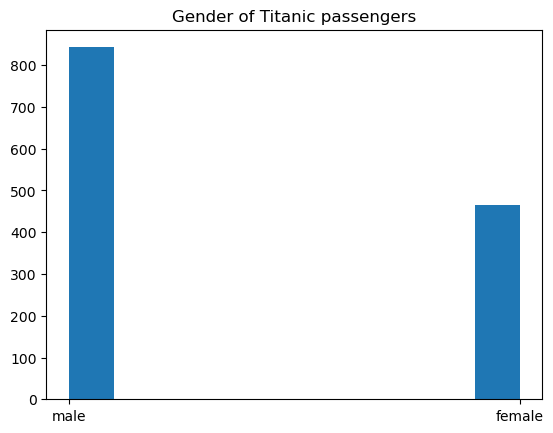

In [452]:
plt.hist(titanic_data.Sex)
plt.title("Gender of Titanic passengers")

In [453]:
#inspect the column for perished vs survived
#0= perished, 1 = survived
print(titanic_data.Survived)

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: Survived, Length: 1309, dtype: float64


In [454]:
perished = 0
survived = 0

In [455]:
for i in titanic_data.Survived:
    if i == 1:
        survived += 1
    else:
        perished += 1

In [456]:
print("Of the " + str(people_count) + " on the Titanic, " + str(perished) + " perished, and " + str(survived) + " survived.")

Of the 1309 on the Titanic, 967 perished, and 342 survived.


Text(0, 0.5, 'People')

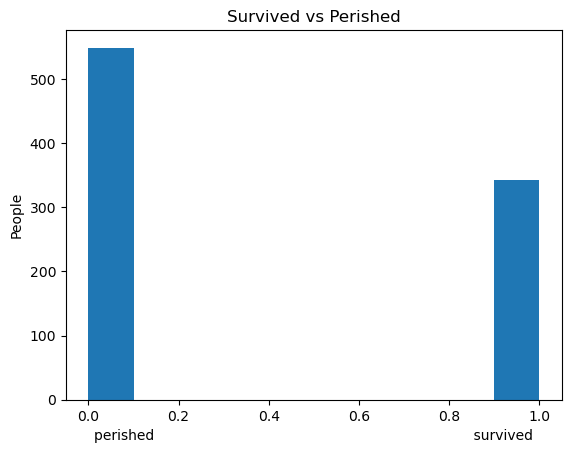

In [457]:
plt.hist(titanic_data.Survived)
plt.title("Survived vs Perished")

plt.xlabel('perished                                                                         survived')

plt.ylabel('People')

In [458]:
dead_percentage = round((perished / people_count) * 100)

In [459]:
print("The percentage of passengers who died on the Titanic that night were: " + str(dead_percentage) + "%")

The percentage of passengers who died on the Titanic that night were: 74%


In [460]:
#Southampton, Cherbourg, and Queenstown
embarked_S = 0
embarked_C = 0
embarked_Q = 0

In [461]:
for e in titanic_data.Embarked:
    if e == 'S':
        embarked_S += 1
    elif e == 'C':
        embarked_C += 1
    else:
        embarked_Q += 1

In [462]:
print("Number of passengers who embarked in Southampton: " + str(embarked_S))
print("Number of passengers who embarked in Cherbourg: " + str(embarked_C))
print("Number of passengers who embarked in Queenstown: " + str(embarked_Q))

Number of passengers who embarked in Southampton: 914
Number of passengers who embarked in Cherbourg: 270
Number of passengers who embarked in Queenstown: 125


In [463]:
#Economic classes on the Titanic... 1st = Upper, 2nd = Middle, 3rd = Lower
Pclass_1 = 0
Pclass_2 = 0
Pclass_3 = 0

In [464]:
for p in titanic_data.Pclass:
    if p == 1:
        Pclass_1 += 1
    if p == 2:
        Pclass_2 += 1
    else:
        Pclass_3 += 1

In [465]:
print("Number of First Class passengers: " + str(Pclass_1))
print("Number of Second Class passengers: " + str(Pclass_2))
print("Number of Third Class passengers: " + str(Pclass_3))

Number of First Class passengers: 323
Number of Second Class passengers: 277
Number of Third Class passengers: 1032


In [466]:
#Sibsp... The dataset defines family relations in this way…
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)
print(titanic_data.SibSp)

0       1
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    1
Name: SibSp, Length: 1309, dtype: int64


In [467]:
print(titanic_data.Parch)

0       0
1       0
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    1
Name: Parch, Length: 1309, dtype: int64


In [468]:
print(len(titanic_data.Parch))

1309


In [469]:
parent_child = 0
for p in titanic_data.Parch:
    if p == 0:
        parent_child += 1
print("Number of solo travellers: " + str(parent_child))

Number of solo travellers: 1002


In [470]:
#The Titanic accepted money in British pounds, and also in American dollars. Unsure which this dataset uses.
Fare_avg_price = np.mean(titanic_data.Fare)
print("The average price for a ticket on the Titanic was: $" + str(round(Fare_avg_price,2)))

Fare_max_price = np.max(titanic_data.Fare)
print("The highest price for a ticket on the Titanic was: $" + str(round(Fare_max_price,2)))


Fare_min_price = np.min(titanic_data.Fare)
print("The lowest price for a ticket on the Titanic was: $" + str(round(Fare_min_price,2)))

The average price for a ticket on the Titanic was: $33.3
The highest price for a ticket on the Titanic was: $512.33
The lowest price for a ticket on the Titanic was: $0.0


In [471]:
#38% survived. 61% perished
titanic_data.Survived.value_counts(normalize=True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

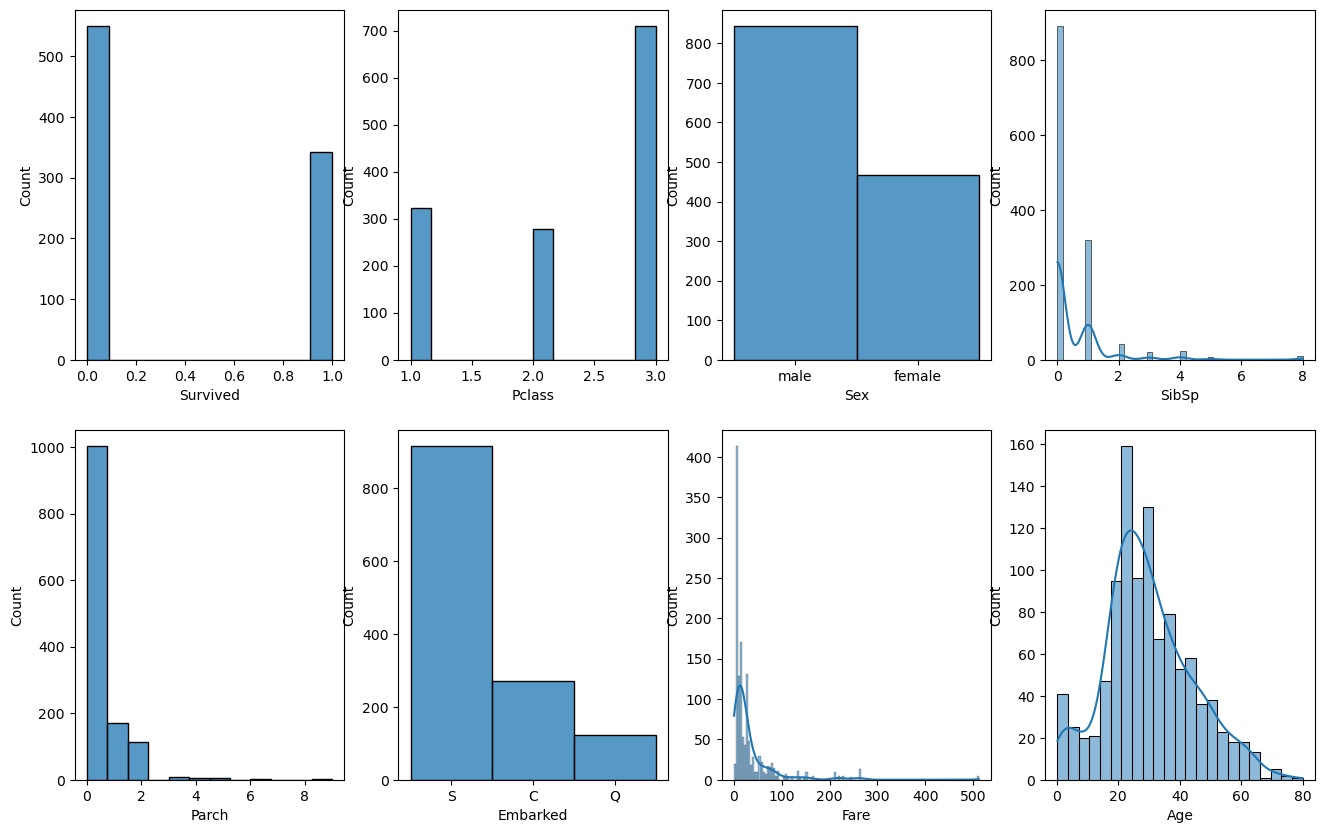

In [472]:
#Analysis of the columns.
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

sns.histplot(titanic_data['Survived'],ax=axes[0,0])
sns.histplot(titanic_data['Pclass'],ax=axes[0,1])
sns.histplot(titanic_data['Sex'],ax=axes[0,2])
sns.histplot(titanic_data['SibSp'],ax=axes[0,3], kde=True)
sns.histplot(titanic_data['Parch'],ax=axes[1,0])
sns.histplot(titanic_data['Embarked'],ax=axes[1,1])
sns.histplot(titanic_data['Fare'], kde=True,ax=axes[1,2])
sns.histplot(titanic_data['Age'].dropna(),kde=True,ax=axes[1,3])

[Text(0.5, 0, '0 = Perished / 1 = Survived'), Text(0, 0.5, 'Price of Fare')]

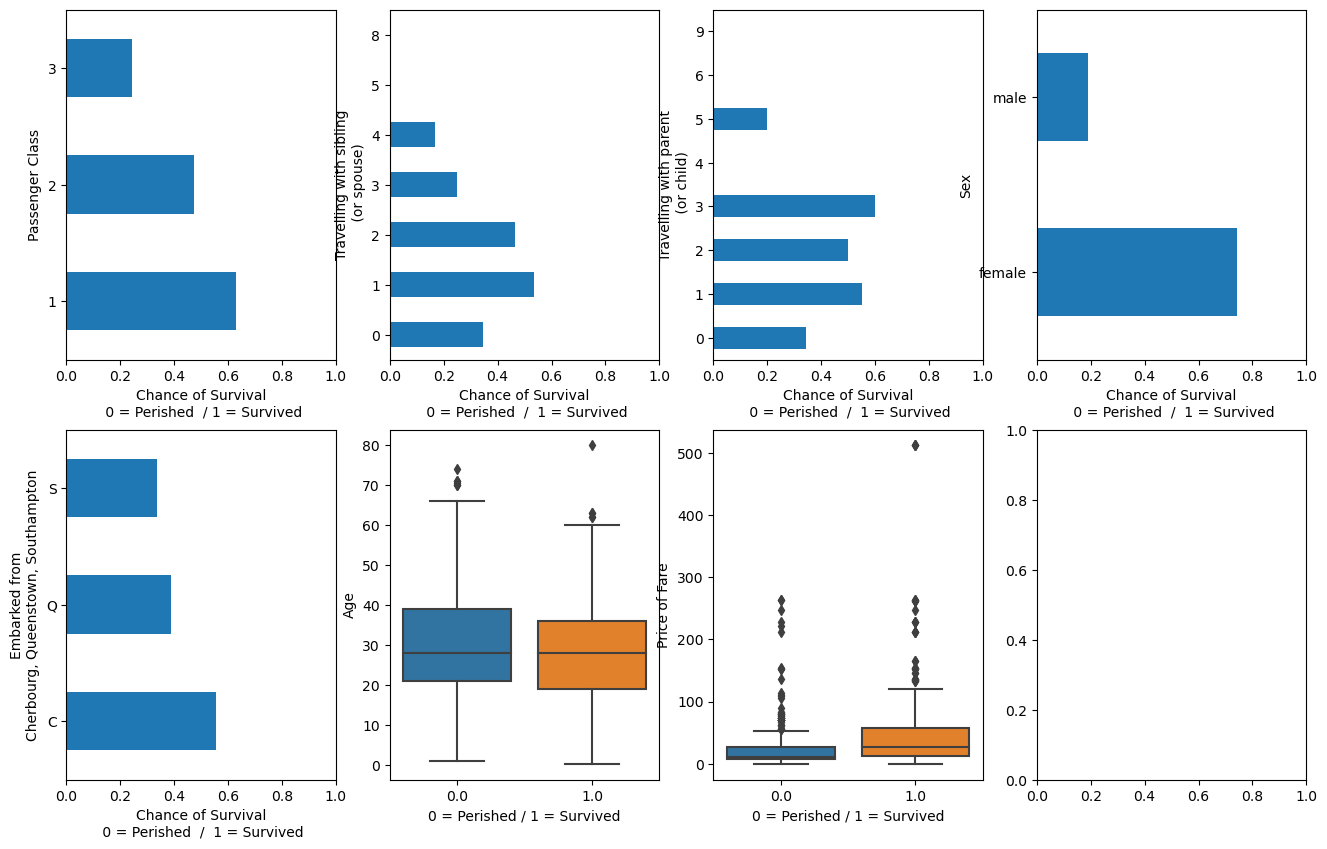

In [473]:
#Comparing various columns to the Survived column.
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
titanic_data.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1], xlabel ="Chance of Survival\n 0 = Perished  / 1 = Survived", ylabel="Passenger Class")
titanic_data.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1], xlabel = "Chance of Survival\n 0 = Perished  /  1 = Survived", ylabel="Travelling with sibling\n (or spouse)")
titanic_data.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1], xlabel = "Chance of Survival\n 0 = Perished  /  1 = Survived", ylabel="Travelling with parent\n (or child)")
titanic_data.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1], xlabel = "Chance of Survival\n 0 = Perished  /  1 = Survived")
titanic_data.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1], xlabel = "Chance of Survival\n 0 = Perished  /  1 = Survived", ylabel="Embarked from\nCherbourg, Queenstown, Southampton")
sns.boxplot(x="Survived", y="Age", data=titanic_data,ax=axesbi[1,1]).set(xlabel='0 = Perished / 1 = Survived', ylabel='Age')
sns.boxplot(x="Survived", y="Fare", data=titanic_data,ax=axesbi[1,2]).set(xlabel='0 = Perished / 1 = Survived', ylabel='Price of Fare')

In [475]:
#There is a correlation between Sex and survival rate on the Titanic. Females were far more likely to survive.
#There is also a correlation between Class. 1st class passengers were more likely than 2nd class passengers to survive.
#... and 3rd class passengers had a low rate of survival.
#Passengers who embarked from Cherbourg had a higher rate of survival. Those who embarked from Southampton had a lower survival rate.
#Passengers who paid a higher fare had a higher chance of survival.
#Passengers who were travelling with 3 other family members had a higher survival rate. Passengers travelling with 5 other family members had a lower survival rate.
#Passengers who travelled with a spouse had the highest rate of survival, as compared to those travelling with 3 or 4 siblings.
#

In [476]:
#The comparisons in this report were based off of a dataset that did not match the actual data from 
#the real Titanic. 
#As a result, the amount of deaths shown in this report are much lower than actual Titanic deaths.
#